# 1. (Freeman) Chain code

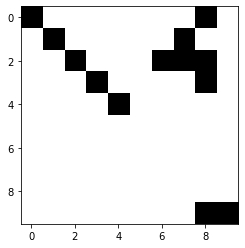

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
freeman_code = [3, 3, 3, 3, 3, 4, 6, 5, 5, 0, 0, 6]
img = np.zeros((10,10))
x, y = 4, 4 
img[y][x] = 1
for direction in freeman_code:
    if direction in [1,2,3]:
        y -= 1
    if direction in [5,6,7]:
        y += 1
    if direction in [3,4,5]:
        x -= 1
    if direction in [0,1,7]:
        x += 1
    img[y][x] = 1
plt.imshow(img, cmap='binary', vmin=0, vmax=1)
plt.show()

# 2. Histogram Oriented Gardiant (HOG)

(1329, 1200, 3)
(512, 400, 3)


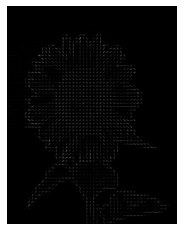

In [6]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
# reading the image
img = imread('Sunflower.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)
# resizing image
resized_img = resize(img, (128*4, 100*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
 cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

# 3. Local Binary Pattern (LBP)

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def get_pixel(img, center, x, y):
    new_value =
    try: 
        if img[x][y] >= center:
            new_value = 1
    except:
        pass

    return new_value
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
# top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
# top
    val_ar.append(get_pixel(img, center, x-1, y))
# top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
# right
    val_ar.append(get_pixel(img, center, x, y + 1))
# bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
# bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
# bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
# left
    val_ar.append(get_pixel(img, center, x, y-1))
# Now, we need to convert binary
# values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val
path = 'blue.png'
img_bgr = cv2.imread(path, 1)
height, width, _ = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((height, width),np.uint8)
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
plt.imshow(img_bgr)
plt.show()
plt.imshow(img_lbp, cmap ="gray")
plt.show()
print("LBP Program is finished")


SyntaxError: invalid syntax (Temp/ipykernel_9032/298345085.py, line 5)

# 4. Skeleton

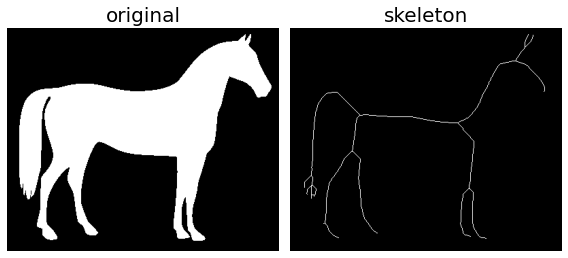

In [20]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
# Invert the horse image
image = invert(data.horse())
# perform skeletonization
skeleton = skeletonize(image)
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)
ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)
fig.tight_layout()
plt.show()
                         

# 5. Convex Hull

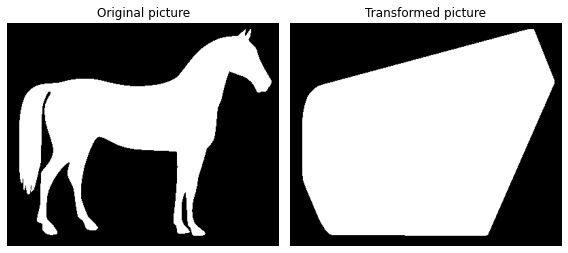

In [21]:
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert
# The original image is inverted as the object must be white.
image = invert(data.horse())
chull = convex_hull_image(image)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()
plt.tight_layout()
plt.show()

# 6. Bounding Box

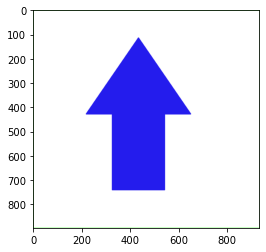

In [23]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('tir.png')
copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
ROI_number = 0
for c in cnts:
 x,y,w,h = cv2.boundingRect(c)
 ROI = image[y:y+h, x:x+w]
 cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
 cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
 ROI_number += 1
plt.imshow(copy)
